# Fish Census Diel Plot
This notebook takes a CSV of fish census data and plots it on an hour vs date plot in order to highlight diel variation. 

In [1]:
import pandas as pd
import datetime as dt
import plotly.express as px

/home/pliny/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/pliny/.local/lib/python3.9/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


## Compose dataframe

Read in CSV:

In [2]:
fname = "Dryad_Moorea_Video_Analysis_long_format_all_sites.csv"
titlestring = "Moorea Fish Census"
shift = dt.timedelta(0, 0, 0, 1, 0, 0) # Start time of video, relative to 0 UT. 
df = pd.read_csv(fname)

Verify datetime formatting. Ideally, we'd create a new column for local mean time. (For bonus points, compute the solar zenith angle for each location and overplot.) 

In [3]:
df["Date"] = pd.to_datetime(df["Date"], format='%m/%d/%y') # cast to datetime
# df["LMT"]= df["Video_time_stamp"] + shift 
df

Video_name     Site       Date  Average_depth_m  Latitude  Longitude  \
0      GOPR9991  Vaipahu 2018-06-23               15 -17.47761 -149.84890   
1      GOPR9991  Vaipahu 2018-06-23               15 -17.47761 -149.84890   
2      GOPR9991  Vaipahu 2018-06-23               15 -17.47761 -149.84890   
3      GOPR9991  Vaipahu 2018-06-23               15 -17.47761 -149.84890   
4      GOPR9991  Vaipahu 2018-06-23               15 -17.47761 -149.84890   
...         ...      ...        ...              ...       ...        ...   
6296   GOPR1967  Tiahura 2018-11-25               10 -17.48301 -149.89992   
6297   GOPR1967  Tiahura 2018-11-25               10 -17.48301 -149.89992   
6298   GOPR1967  Tiahura 2018-11-25               10 -17.48301 -149.89992   
6299   GOPR1967  Tiahura 2018-11-25               10 -17.48301 -149.89992   
6300   GOPR1967  Tiahura 2018-11-25               10 -17.48301 -149.89992   

     Time_category  Video_number  10_sec_interval  Interval Video_time_stamp  \
0          Morning             1                1         1             0:10   
1          Morning             1                2         2             0:20   
2          Morning             1                2         2             0:20   
3          Morning             1                3         3             0:30   
4          Morning             1                3         3             0:30   
...            ...           ...              ...       ...              ...   
6296       Evening             1               41        41             8:50   
6297       Evening             1               41        41             8:50   
6298       Evening             1               41        41             8:50   
6299       Evening             1               41        41             8:50   
6300       Evening             1               41        41             8:50   

     Species_code             Species_full       Trophic_cat  Total_N  
0         PA.ARCA    Paracirrhites arcatus  Lower-carnivores        1  
1         PA.ARCA    Paracirrhites arcatus  Lower-carnivores        1  
2         CH.PELE     Chaetodon pelewensis  Lower-carnivores        1  
3         CT.FLAV  Ctenochaetus flavicauda        Herbivores        1  
4         CH.IOME          Chromis iomelas        Herbivores        2  
...           ...                      ...               ...      ...  
6296      CH.PELE     Chaetodon pelewensis  Lower-carnivores        1  
6297      CT.STRI    Ctenochaetus striatus        Herbivores        1  
6298      CH.ACAR           Chromis acares       Planktivore        3  
6299      ZE.SCOP         Zebrasoma scopas        Herbivores        1  
6300      CT.FLAV  Ctenochaetus flavicauda        Herbivores        1  

[6301 rows x 15 columns]

Here's the plot I initially had in mind. If we had 24 hour data, this might show diel/seasonal trends. As is, it's kind of a waste of the X axis.

/home/pliny/.local/lib/python3.9/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/pliny/.local/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



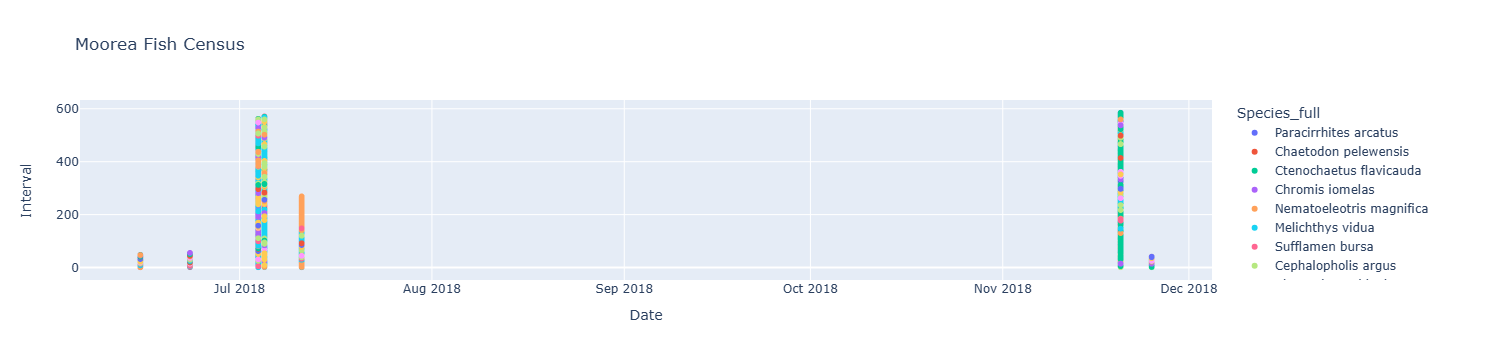

In [156]:
fig = px.scatter(df, x="Date", y="Interval", 
                 color = "Species_full" ,
                 # color="Species_full", 
                 # facet_row="Site", 
                 # facet_row = "Time_category",
                title = titlestring)# hover_info = "Species_full")
       # category_orders={"genre_1": ["Action", "Drama", "Biography"]})
fig.show()
fig.write_html("plots/"+titlestring +" Facet Diel Plot by Species.html")

We can make a scatter plot with multiple facets:

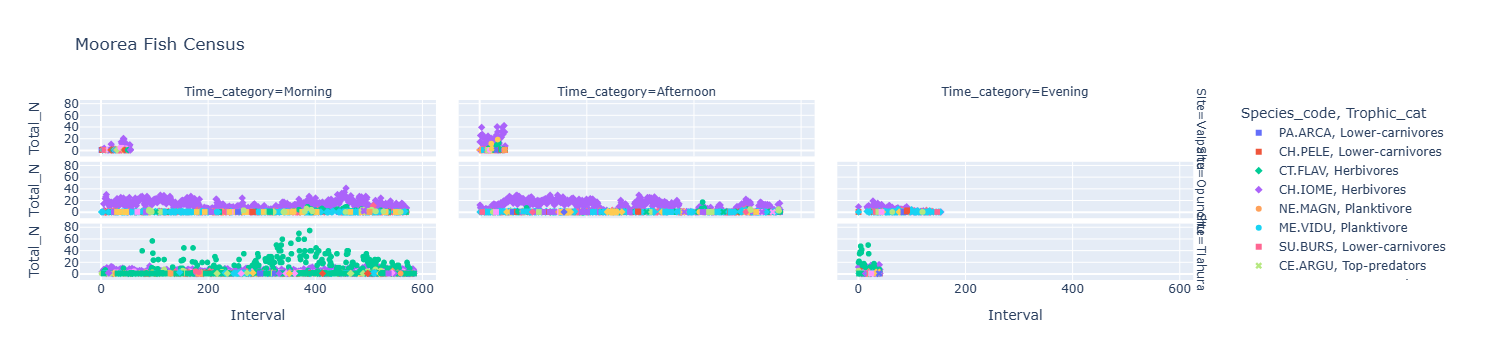

In [97]:
import plotly.express as px
fig = px.scatter(df, x="Interval", y="Total_N", color="Species_code", symbol = "Trophic_cat", 
                 facet_col="Time_category", 
                 facet_row = "Site",
                 # size = "Total_N",
                title = titlestring, # hover_info = "Species_full")
               category_orders={"Trophic_cat": ["Planktivore", "Herbivores", "Lower-carnivores", "Top-predators", "Top-predators sharks"]})
fig.show()
fig.write_html("plots/"+titlestring +" Scatter Count vs Interval.html")

In [41]:
fig = px.scatter(df, x="Species_code", y="Interval", color="Trophic_cat", 
                 facet_row="Site", 
                 facet_col = "Time_category",
                title = titlestring,#)# hover_info = "Species_full")
       category_orders={"Trophic_cat": ["Planktivore", "Herbivores", "Lower-carnivores", "Top-predators", "Top-predators sharks"]})
fig.show()
fig.write_html("plots/"+titlestring +" Facet Trophic Plot.html")

In [118]:

fig = px.histogram(df, x="Total_N", y="Trophic_cat", color="Species_code", marginal="rug", hover_data=df.columns, facet_row = "Time_category")
fig.show()
fig.write_html("plots/"+titlestring +" Histogram.html")

/home/pliny/.local/lib/python3.9/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



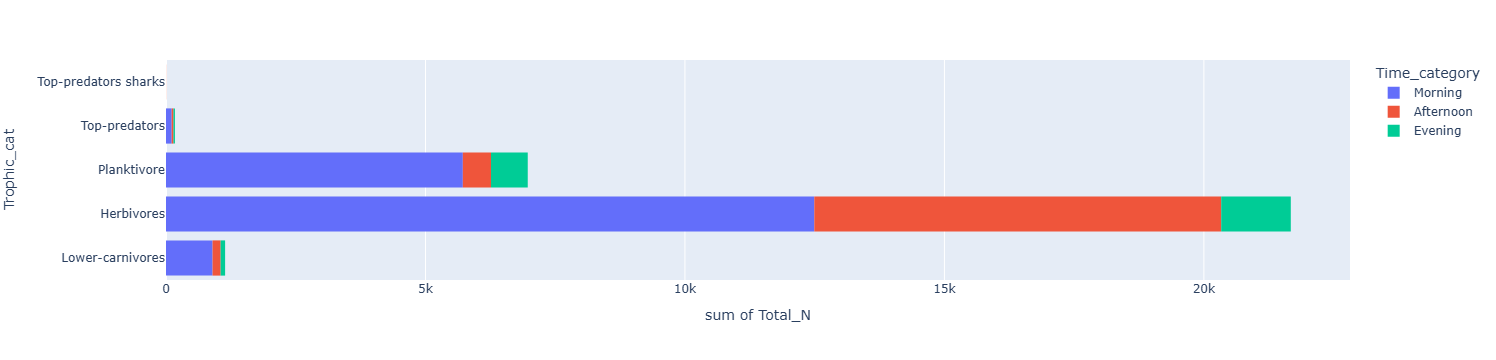

In [140]:

fig = px.histogram(df, x="Total_N", y="Trophic_cat", color="Time_category", #marginal="rug", 
                   hover_data=df.columns
                   # , facet_row = "Site"
                  )
fig.show()
fig.write_html("plots/"+titlestring +" Histogram2.html")

## Misc.
Everything below this is pretty much me plotting things at random. =)

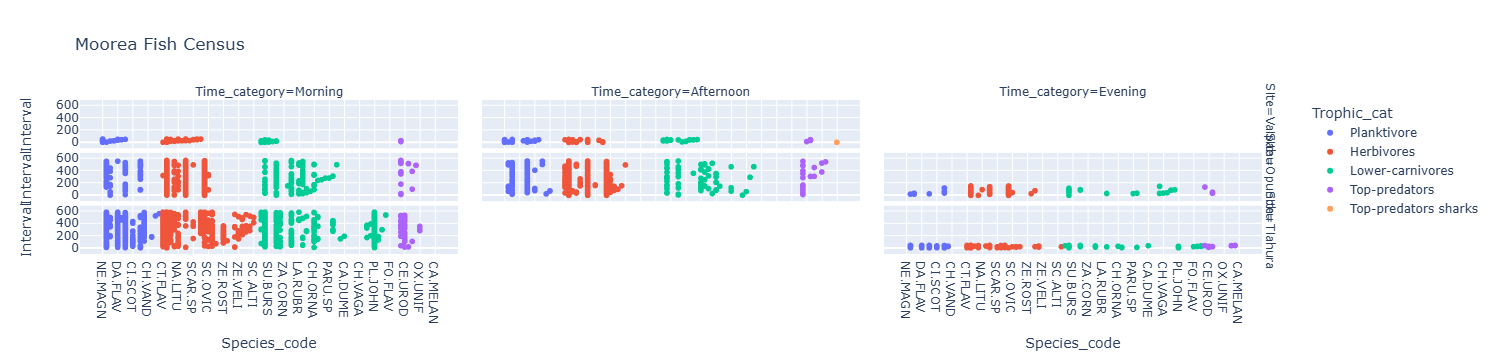

In [44]:
import plotly.express as px
fig = px.scatter(df, x="Species_code", y="Interval", color="Trophic_cat", 
                 facet_row="Site", 
                 facet_col = "Time_category",
                title = titlestring,
                category_orders={"Trophic_cat": ["Planktivore", "Herbivores", "Lower-carnivores", "Top-predators", "Top-predators sharks"]})# hover_info = "Species_full")
       # category_orders={"genre_1": ["Action", "Drama", "Biography"]})
fig.show()
fig.write_html("plots/"+titlestring +" Facet Trophic Plot.html")

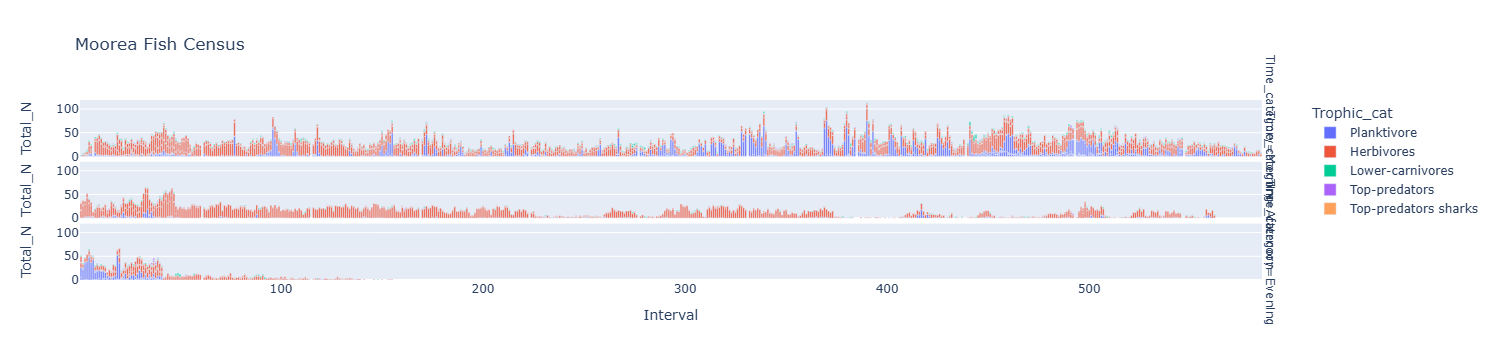

In [46]:
import plotly.express as px
fig = px.bar(df, x="Interval", y="Total_N", color="Trophic_cat", 
                 # facet_col="Site", 
                 facet_row = "Time_category",
                title = titlestring,
            category_orders={"Trophic_cat": ["Planktivore", "Herbivores", "Lower-carnivores", "Top-predators", "Top-predators sharks"]})

fig.show()
fig.write_html("plots/"+titlestring +" Facet Count Bar.html")

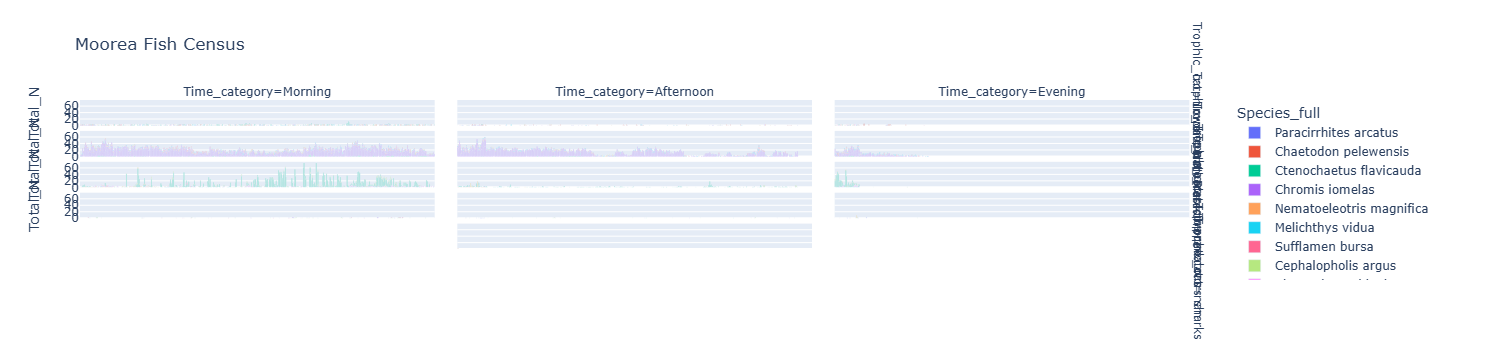

In [158]:
import plotly.express as px
fig = px.bar(df, x="Interval", y="Total_N", color="Species_full", 
                 facet_col="Time_category", 
                 facet_row = "Trophic_cat",
                title = titlestring)# hover_info = "Species_full")
fig.show()
fig.write_html("plots/"+titlestring +" Species Bar Eye Chart.html")

Here's an arbitrary violin plot:

In [61]:
import plotly.express as px
fig = px.violin(df, x="Site", y="Total_N", color="Trophic_cat", 
                 facet_col="Time_category", 
                 # facet_row = "Trophic_cat",
                title = titlestring)# hover_info = "Species_full")
fig.show()
fig.write_html("plots/"+titlestring +" Nonstop Violins.html")

In [157]:
# Example of neat things plotly express can do:

# import numpy as np
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# stepsize = 0.5
# num_steps = 250

# # Generating 2D random walk data
# pos = np.cumsum(np.random.normal(0, stepsize, (num_steps, 2)), axis=0)
# x,y = pos[:,0], pos[:,1]

# # Determining quadrant for each step
# quadrants = np.zeros(num_steps)
# quadrants[(x >= 0) & (y >= 0)] = 1  # First quadrant
# quadrants[(x < 0) & (y >= 0)] = 2   # Second quadrant
# quadrants[(x < 0) & (y < 0)] = 3    # Third quadrant
# quadrants[(x >= 0) & (y < 0)] = 4   # Fourth quadrant

# # Counting occurrences in each quadrant
# quadrant_counts = [np.sum(quadrants == q) for q in range(1, 5)]
# # Counting occurrences at (0,0)
# origin_count = np.sum((x == 0) & (y == 0))

# ##color for each quadrant 
# colors = ['red', 'blue', 'green', 'purple']

# ##showing the random walk, in each quadrant 
# fig1 = go.Figure()
# for q in range(1, 5):
#     x_q = x[quadrants == q]
#     y_q = y[quadrants == q]
#     fig1.add_trace(go.Scatter(
#         x=x_q,
#         y=y_q,
#         name=f'Quadrant {q}',
#         legendgroup= f'Quadrant {q}',
#         mode='markers+lines',
#         marker=dict(
#             color=colors[q-1],
#             size=10
#         ),
#         line=dict(color='black', width=1),
#     ))

# ## text annotations indicating the starting and end point
# fig1.add_trace(go.Scatter(
#     x=[x[0], x[-1]],
#     y=[y[0], y[-1]],
#     mode='markers+text',
#     name='Start and End Point',
#     text=['Starting Point', 'End Point'],
#     textposition='bottom center',
#     marker=dict(color='black', size=15),
#     textfont=dict(color='black', size=10)
# ))

# ## for colored background for each quadrant
# quadrant_shapes = []
# for q in range(4):
#     if q == 0:
#         x0, y0, x1, y1 = 0, 0, max(x) + 2, max(y) + 2
#     elif q == 1:
#         x0, y0, x1, y1 = min(x) - 2, 0, 0, max(y) + 2
#     elif q == 2:
#         x0, y0, x1, y1 = min(x) - 2, min(y) - 2, 0, 0
#     else:
#         x0, y0, x1, y1 = 0, min(y) - 2, max(x) + 2, 0

#     quadrant_shapes.append(
#         dict(
#             type="rect",
#             xref="x",
#             yref="y",
#             x0=x0,
#             y0=y0,
#             x1=x1,
#             y1=y1,
#             fillcolor=colors[q],
#             opacity=0.2,
#             line=dict(width=0),
#             layer="below"
#         )
#     )

# fig1.update_layout(shapes=quadrant_shapes)

# for axis, limits in zip(['x', 'y'], [(min(x) - 2, max(x) + 2), (min(y) - 2, max(y) + 2)]):
#     fig1.add_shape(
#         type='line',
#         x0=limits[0] if axis == 'x' else 0,
#         y0=limits[0] if axis == 'y' else 0,
#         x1=limits[1] if axis == 'x' else 0,
#         y1=limits[1] if axis == 'y' else 0,
#         line=dict(color='black', width=2)
#     )

# # Creating the bar plot for the counts
# fig2 = go.Figure()
# for q in range(1, 5):
#     fig2.add_trace(go.Bar(
#         x=[f'Quadrant {q}'],
#         y=[quadrant_counts[q - 1]],
#         marker_color=colors[q - 1],
#         name=f'Quadrant {q}',
#         legendgroup= f'Quadrant {q}',
#     ))
    
# # Creating subplots
# fig = make_subplots(rows=2, cols=1, subplot_titles=['2D Random Walk', 'Position Counts'], 
#                    vertical_spacing=0.1)

# # Adding traces from fig1
# for trace in fig1.data:
#     fig.add_trace(trace, row=1, col=1)

# # Adding shapes from fig1
# for shape in fig1.layout.shapes:
#     fig.add_shape(shape)

# # Adding layout attributes from figures
# fig.update_layout(fig1.layout)
# fig.update_layout(fig2.layout)

# # Adding bar plot for the counts in the second subplot
# for trace in fig2.data:
#     fig.add_trace(trace, row=2, col=1)
    
# fig.update_layout(height=1200, width=1000, xaxis_title='x',yaxis_title='y',xaxis2_title='Quadrant',yaxis2_title='Count',
#                   showlegend=True, legend=dict( orientation="h",yanchor="top",y=1.1,xanchor="right",x=1))
                
# fig.show()
